In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import sys
import pandas as pd

import pickle
import glob
import re
import yaml
import torch
import json

In [13]:
# draw basic L-shaped figure. 
# root = "/checkpoint/yuandong/outputs/2019-08-28_15-21-47"

# python two_layer_new2.py -s multi=1,2,5,10 d=100 m=5 teacher_strength_decay=0,1,1.5,2,2.5,3 lr=0.005 N=1000 num_iter=30000
root = "/checkpoint/yuandong/outputs/2019-08-30_15-50-04"

# python two_layer_new2.py -s multi=1,2,5,10 d=100 m=5 teacher_strength_decay=0.1,0.2,0.5,0.7 lr=0.005 N=1000 num_iter=30000
# root = "/checkpoint/yuandong/outputs/2019-08-30_19-49-58"

# python two_layer_new2.py -s multi=1,2,5,10 d=100 m=20 teacher_strength_decay=0.1,0.2,0.5,0.7 lr=0.005 N=1000 num_iter=30000
root = "/checkpoint/yuandong/outputs/2019-08-30_20-30-33"

# python two_layer_new2.py -s multi=1,2,5,10 d=100 m=20 teacher_strength_decay=0,1,1.5,2,2.5,3 lr=0.005 N=1000 num_iter=30000
root = "/checkpoint/yuandong/outputs/2019-08-30_20-40-54"


# python two_layer_new2.py -s multi=1,2,5,10 d=100 m=20 teacher_strength_decay=0,1,1.5,2,2.5,3 lr=0.05 N=1000 num_iter=50000
root = "/checkpoint/yuandong/outputs/2019-08-30_21-34-24"

# SGD era
# Baseline, without SGD what happens (probably bad)
# python two_layer_new2.py -s multi=1,2,5,10 d=100 m=10,20 teacher_strength_decay=0,1,1.5,2,2.5,3 lr=0.05 N=1024 num_iter=50000
root = "/checkpoint/yuandong/outputs/2019-08-30_23-09-55"

# SGD should be much better. 
# python two_layer_new2.py -m multi=1,2,5,10 d=100 m=10,20 teacher_strength_decay=0,1,1.5,2,2.5,3 lr=0.05 N=32 num_iter=100000 use_sgd=true hydra/launcher=fairtask
root = "/checkpoint/yuandong/outputs/2019-08-31_09-42-50"

# python two_layer_new2.py -m multi=1,2,5,10 d=100 m=5 teacher_strength_decay=0,1,1.5,2,2.5,3 lr=0.02 N=32 num_iter=100000 adv_init=adv,help,none use_sgd=true hydra/launcher=fairtask
#root = "/checkpoint/yuandong/outputs/2019-08-31_10-33-35"

# python two_layer_new2.py -m multi=1,2,5,10 d=100 m=5 teacher_strength_decay=0,1,1.5,2,2.5,3 lr=0.02 N=32 num_iter=100000 adv_init=adv,help,none use_sgd=true hydra/launcher=fairtask
root = "/checkpoint/yuandong/outputs/2019-08-31_10-33-35"

# python two_layer_new2.py -m multi=1,2,5,10 d=100 m=10,20,50 teacher_strength_decay=0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.5 lr=0.02 N=32 num_iter=100000 use_sgd=true
root = "/checkpoint/yuandong/outputs/2019-08-31_16-22-30"
lr = 0.02

# python two_layer_new2.py -m multi=1,2,5,10 d=100 m=10,20,50 teacher_strength_decay=0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.5 lr=0.01 N=32 num_iter=100000 use_sgd=true
# root = "/checkpoint/yuandong/outputs/2019-08-31_16-16-27"
# lr = 0.01

# no normalization. 
# python two_layer_new2.py -m multi=1,2,5,10 d=100 m=10,20,50 teacher_strength_decay=0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.5 lr=0.02 N=32 num_iter=100000 use_sgd=true normalize=false
root = "/checkpoint/yuandong/outputs/2019-08-31_23-35-27"
lr = 0.02

# no normalization. 
# python two_layer_new2.py -m multi=1,2,5,10 d=100 m=10,20,50 teacher_strength_decay=0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.5 lr=0.01 N=32 num_iter=100000 use_sgd=true normalize=false
# root = "/checkpoint/yuandong/outputs/2019-08-31_23-35-59"
# lr = 0.01

# New experiments (with fixed size of training set, and epoch/minibatch)
root = "/checkpoint/yuandong/outputs/2019-09-10_21-07-56"
lr = 0.01

root = "/checkpoint/yuandong/outputs/2019-09-22/09-09-32"
lr = 0.01

data = []
total = 0
folders = sorted(glob.glob(os.path.join(root, "*")))
last_prefix = None

for folder in folders:
    path, folder_name = os.path.split(folder)
    prefix, job_id = folder_name.split("_")
    if prefix == last_prefix:
        continue
        
    args = yaml.load(open(os.path.join(folder, "config.yaml"), "r"))
    filename = os.path.join(folder, "stats.pickle")
    if os.path.exists(filename):
        print(f"{len(data)}: {folder}")
        stats = torch.load(filename)
        data.append(dict(args=args,stats=stats))
        last_prefix = prefix

0: /checkpoint/yuandong/outputs/2019-09-22/09-09-32/0_17955506
1: /checkpoint/yuandong/outputs/2019-09-22/09-09-32/10_17955516
2: /checkpoint/yuandong/outputs/2019-09-22/09-09-32/11_17955517
3: /checkpoint/yuandong/outputs/2019-09-22/09-09-32/12_17955518
4: /checkpoint/yuandong/outputs/2019-09-22/09-09-32/13_17955519
5: /checkpoint/yuandong/outputs/2019-09-22/09-09-32/14_17955520
6: /checkpoint/yuandong/outputs/2019-09-22/09-09-32/15_17955521
7: /checkpoint/yuandong/outputs/2019-09-22/09-09-32/16_17955522
8: /checkpoint/yuandong/outputs/2019-09-22/09-09-32/17_17955523
9: /checkpoint/yuandong/outputs/2019-09-22/09-09-32/18_17955524
10: /checkpoint/yuandong/outputs/2019-09-22/09-09-32/19_17955525
11: /checkpoint/yuandong/outputs/2019-09-22/09-09-32/1_17955507
12: /checkpoint/yuandong/outputs/2019-09-22/09-09-32/20_17955526
13: /checkpoint/yuandong/outputs/2019-09-22/09-09-32/21_17955527
14: /checkpoint/yuandong/outputs/2019-09-22/09-09-32/22_17955528
15: /checkpoint/yuandong/outputs/2019

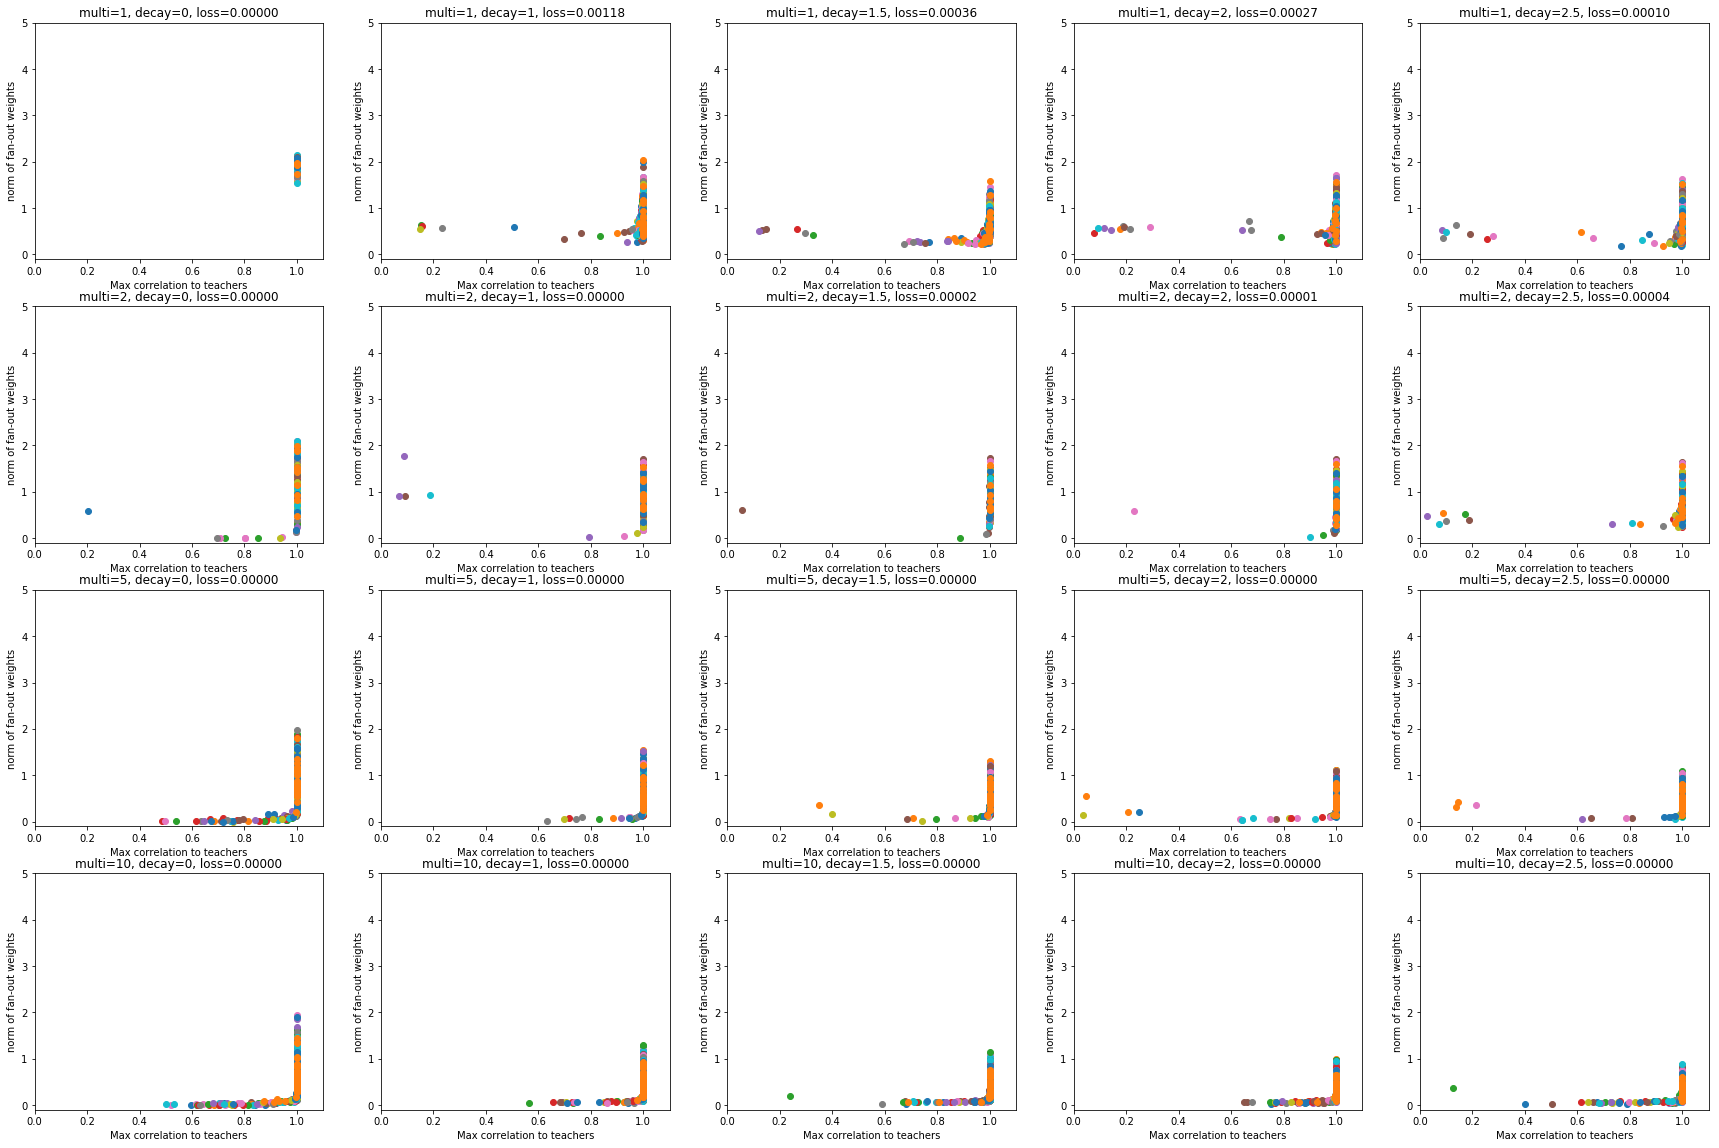

In [14]:
### s = stats[-1]

def find_params(data, cond):
    for d in data:
        found = True
        for k, v in cond.items():
            if d["args"][k] != v:
                found = False
        if found:
            return d
    return None


multis = (1, 2, 5, 10)
decays = (0, 1, 1.5, 2, 2.5)
# decays = (0.1, 0.2, 0.5, 0.7)

plt.figure(figsize=(30, 20))

counter = 1
for multi in multis:
    for decay in decays:
        plt.subplot(len(multis), len(decays), counter)
        counter += 1
        
        d = find_params(data, dict(multi=multi, teacher_strength_decay=decay))

        # print("multi: ", d["args"]["multi"])
        # print("decay: ", d["args"]["teacher_strength_decay"])

        losses = []
        
        for seed, stats in d["stats"].items():
            s = stats[-1]

            corrs = s["corr_train"]

            norms = s["W2_s"].norm(dim=1)
            norms = norms[:-1]

            plt.scatter(corrs.max(dim=0)[0], norms)
            losses.append(s["eval_loss"])

        plt.xlabel('Max correlation to teachers')
        plt.ylabel('norm of fan-out weights')
        plt.title(f"multi={multi}, decay={decay}, loss={sum(losses) / len(losses):#.5f}")
        plt.axis([0.0, 1.1, -0.1, 5.0])

        # plt.legend()
plt.show()

# plt.savefig("corr-weight-norm.pdf")

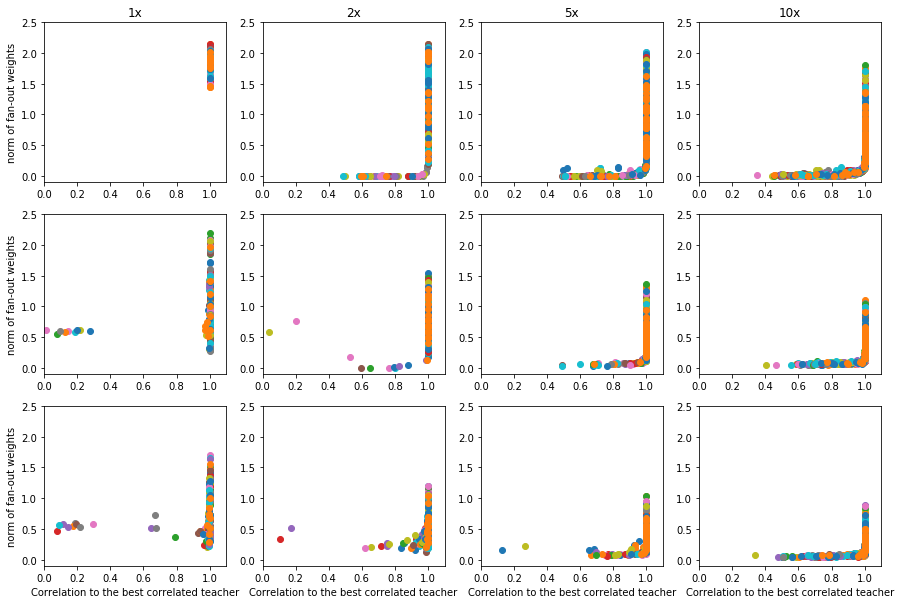

In [43]:
# Figure 1. L-shape with 2-layer network. 

multis = (1, 2, 5, 10)
decays = (0, 1, 2)
num_teacher = 10

plt.figure(figsize=(15, 10))

counter = 1
for decay in decays:
    for multi in multis:
        plt.subplot(3, len(multis), counter)
        counter += 1

        d = find_params(data, dict(multi=multi, teacher_strength_decay=decay, m=num_teacher))

        # print("multi: ", d["args"]["multi"])
        # print("decay: ", d["args"]["teacher_strength_decay"])

        losses = []

        for seed, stats in d["stats"].items():
            s = stats[-1]

            corrs = s["corr_train"]

            norms = s["W2_s"].norm(dim=1)
            norms = norms[:-1]

            plt.scatter(corrs.max(dim=0)[0], norms)
            losses.append(s["eval_loss"])
            
        if decay == 2:
            plt.xlabel('Correlation to the best correlated teacher')
            
        if multi == 1:
            plt.ylabel('norm of fan-out weights')
        # plt.title(f"{multi}x, loss={sum(losses) / len(losses):#.2f}")
        
        if decay == 0: 
            plt.title(f"{multi}x")
        plt.axis([0.0, 1.1, -0.1, 2.5])
    
plt.savefig(f"l-shape-m{num_teacher}_lr{lr}.pdf")
    
plt.show()

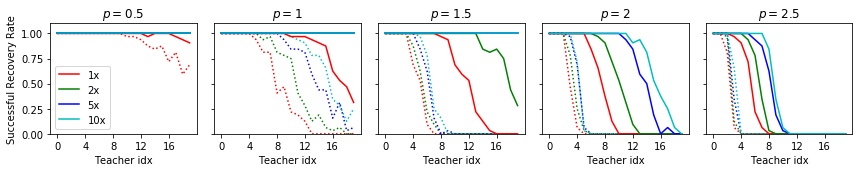

In [21]:
# Figure 2. Histogram
multis = (1, 2, 5, 10)
thres = 0.95
num_teacher = 20

plt.figure(figsize=(12, 2.5))
# plt.figure()

counter = 0

# fig, ax = plt.subplots(figsize=(6, 5))
for decay in (0.5, 1, 1.5, 2, 2.5):
    ax = plt.subplot(1, 5, counter + 1)
    counter += 1
    for iter, style in zip((5, -1), (':', '-')):
        bars = []
        ind = torch.FloatTensor(list(range(num_teacher)))
        # width = 0.15
        colors = ['r', 'g','b','c']
        for i, multi in enumerate(multis):
            #plt.subplot(1, len(multis), counter)
            #counter += 1

            d = find_params(data, dict(multi=multi, teacher_strength_decay=decay, m=num_teacher))

            losses = []

            counts = None
            for seed, stats in d["stats"].items():
                s = stats[iter]
                v = (s["counts_eval"][thres] > 0).float()
                if counts is None:
                    counts = v
                else:
                    counts += v

                losses.append(s["eval_loss"])

            counts /= len(d["stats"])
            plt.plot(ind.numpy(), counts.numpy(), colors[i], label=f"{multi}x" if iter == -1 else None, linestyle=style)
            # plt.scatter(ind.numpy(), counts.numpy(), color=colors[i])

        # plt.title(f"multi={multi}, loss={sum(losses) / len(losses):#.5f}")
        # plt.title(f"iter={iter}")

    plt.xlabel('Teacher idx')
    plt.title(f"$p={decay}$")
    plt.axis([-1, num_teacher, 0, 1.1])
    if counter == 1:
        plt.ylabel('Successful Recovery Rate')
        plt.legend()
    
    ticks = ind[::4].numpy()

    ax.set_xticks(ticks)
    ax.set_xticklabels([ str(int(i)) for i in ticks ])
    if counter > 1:
        ax.set_yticklabels([])

        # ax.legend(bars, [ f"{multi}x" for multi in multis ])
        
plt.tight_layout()
    
plt.savefig(f"rate_drop_m{num_teacher}_thres{thres}_lr{lr}.pdf")
plt.show()

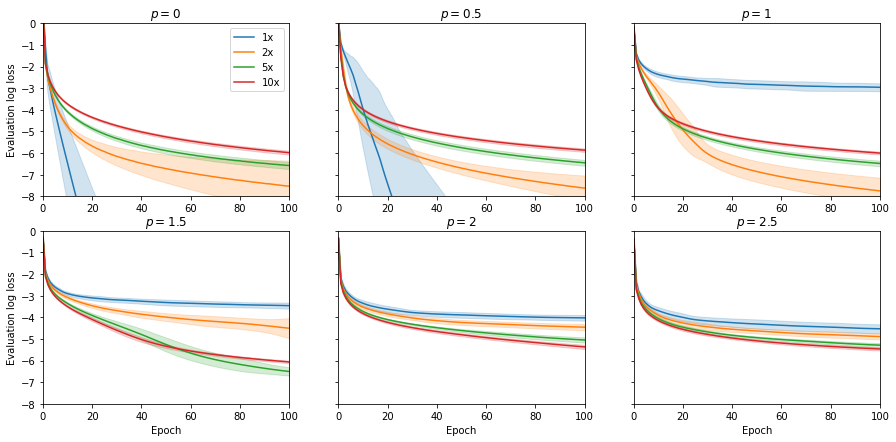

In [51]:
# Figure 3. loss function. 
import math

multis = (1, 2, 5, 10)
decays = (0, 0.5, 1, 1.5, 2, 2.5)
num_teacher = 20

plt.figure(figsize=(15, 7))
# plt.figure()

counter = 1

# fig, ax = plt.subplots(figsize=(6, 5))
for decay in decays:
    ax = plt.subplot(2, len(decays) / 2, counter)
    counter += 1
    for i, multi in enumerate(multis):
        d = find_params(data, dict(multi=multi, teacher_strength_decay=decay, m=num_teacher))
        losses = None
        for j, (seed, stats) in enumerate(d["stats"].items()):
            v = torch.DoubleTensor([ math.log(s["eval_loss"]) / math.log(10.0) for s in stats ])
            if losses is None:
                losses = torch.DoubleTensor(len(stats), len(d["stats"]))
            losses[:, j] = v
            
        loss = losses.mean(dim=1)
        loss_std = losses.std(dim=1)
        p = plt.plot(loss.numpy(), label=f"{multi}x")
        plt.fill_between(list(range(loss.size(0))), (loss - loss_std).numpy(), (loss + loss_std).numpy(), color=p[0].get_color(), alpha=0.2)

    if counter >= 5:
        plt.xlabel('Epoch')
            
    if counter == 2 or counter == 5:           
        plt.ylabel('Evaluation log loss')
    else:
        ax.set_yticklabels([])
            
    plt.title(f"$p={decay}$")
    plt.axis([0, 100, -8, 0])

    if counter == 2:
        plt.legend()
    
plt.savefig(f"convergence_m{num_teacher}_lr{lr}.pdf")
plt.show()


/private/home/yuandong/miniconda3/envs/go10/lib/python3.6/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


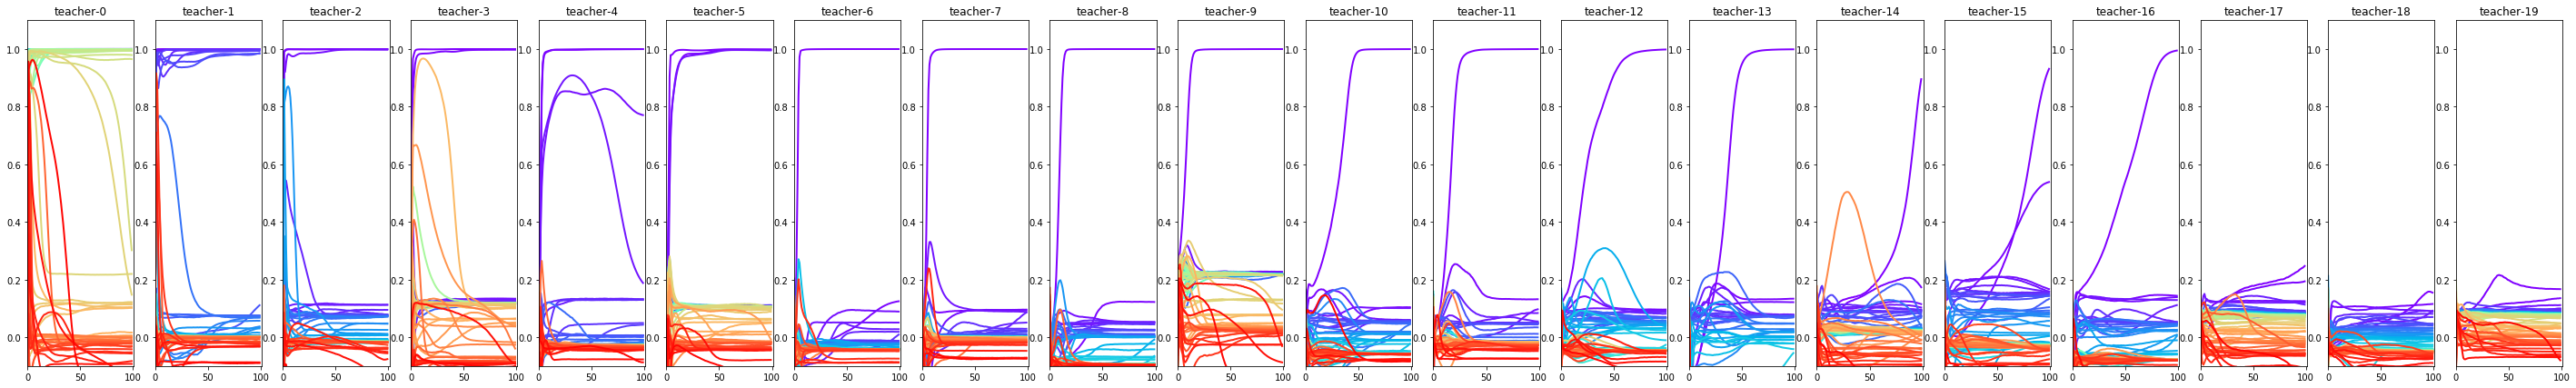

In [588]:
# Figure: convergence.
params = dict(multi=5, teacher_strength_decay=2, m=20)

d = find_params(data, params)

args = d["args"]
stats = d["stats"]
seed = list(stats.keys())[1]
d = stats[seed]

W2_t = d[0]["W2_t"][:-1,:]
vs = W2_t.pow(2).sum(dim=1)
Ms = W2_t @ W2_t.t()

# num_iter = min(len(d), 50)
num_iter = len(d)
num_teacher, num_student = d[1]["corr_eval"].size()

student_norms = torch.DoubleTensor(num_iter - 1, num_student)
student_top_norms = torch.DoubleTensor(num_iter - 1, num_student)
student_A = torch.DoubleTensor(num_iter - 1, num_student, num_teacher)

for it in range(1, num_iter):
    dd = d[it]
    student_norms[it - 1, :] = dd["ss_prod"].diag()
    student_top_norms[it - 1, :] = dd["W2_s"][:-1,:].pow(2).sum(dim=1)
    student_A[it - 1, :, :] = dd["W2_s"][:-1,:] @ W2_t.t()

corrs = d[-1]["corr_eval"]
sorted_corrs, sorted_student_indices = corrs.sort(dim=1, descending=True)

plt.figure(figsize=(50, 7))
for i in range(num_teacher):
    ax = plt.subplot(1, num_teacher, i + 1)
    cm = plt.get_cmap('rainbow')  
    ax.set_color_cycle([cm(1.*i/num_student) for i in range(num_student)])
    for idx in sorted_student_indices[i, :]:
        # if corrs[i, idx] < 0.2: 
        #    break
        # coeff = student_top_norms[:, idx]
        coeff = torch.DoubleTensor([ d[it]["corr_eval"][i, idx] for it in range(1, num_iter) ])
        # coeff = student_A[:, idx, i]
            
        # p = plt.plot(student_top_norms[:, idx].numpy(), linewidth=2, label=f"student-{idx}")
        p = plt.plot(coeff.numpy(), linewidth=2, label=f"student-{idx}")
        #for it in (list(range(1, num_iter, 10)) + [num_iter - 2]):
        #    c = d[it]["corr_eval"][i, idx]
        #    plt.text(it, coeff[it], f"{c:#.2f}", color=p[0].get_color(), backgroundcolor="white")
    plt.title(f"teacher-{i}")
    plt.axis([0, num_iter, -0.1, 1.1])
    # plt.legend()
# plt.show()
plt.savefig(f"student_converge_m{args['m']}_decay{args['teacher_strength_decay']}_multi{args['multi']}.pdf")
plt.show()

In [ ]:
fig = plt.figure(figsize=(20, 4))

cm = plt.get_cmap('rainbow')

for k, decay in enumerate((0.5, 1, 1.5, 2, 2.5)):
    ax = plt.subplot(1, 5, k + 1)
    params = dict(multi=5, teacher_strength_decay=decay, m=20)

    d = find_params(data, params)
    args = d["args"]
    stats = d["stats"]
    seed = list(stats.keys())[5]
    d = stats[seed]

    # num_iter = min(len(d), 50)
    num_iter = len(d)
    num_teacher, num_student = d[1]["corr_eval"].size()

    max_corrs = torch.DoubleTensor(num_iter, num_teacher)
    for it in range(num_iter):
        max_corrs[it, :] = d[it]["corr_eval"].max(dim=1)[0]

    ax.set_color_cycle([cm(1.*i/num_teacher) for i in range(num_teacher)])
    for i in range(num_teacher):
        plt.plot(max_corrs[:, i].numpy(), label=f"teacher-{i}")

    loss = d[-1]["eval_loss"].item()

    # plt.legend()
    plt.xlabel("Epoch")
    plt.axis([0, num_iter, 0.0, 1.1])
    if k == 0:
        plt.ylabel("Correlation of best student to teacher")
    else:
        pass
        # ax.set_yticklabels([])
    plt.title(f"$p = {decay}$, logloss = {math.log(loss)/math.log(10):#.2f}")
    
# ax = plt.subplot(1, 6, 6)

import matplotlib as mpl

cax = fig.add_axes([0.92, 0.12, 0.01, 0.7])

norm = mpl.colors.Normalize(vmin=0, vmax=20)

cb1 = mpl.colorbar.ColorbarBase(cax, cmap=cm,
                                norm=norm,
                                orientation='vertical')
cb1.set_ticks([0, 20])
cb1.set_ticklabels(["Strong Teacher", "Weak Teacher"])

plt.savefig(f"teacher_corr_convergence_m{args['m']}_multi{args['multi']}.pdf")
plt.show()

/private/home/yuandong/miniconda3/envs/go10/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


In [437]:
d = find_params(data, params)

In [483]:
args

{'N': 32,
 'N_eval': 10000,
 'adv_init': 'none',
 'bias': -0.1,
 'c': 50,
 'd': 100,
 'data_std': 1.5,
 'feature_fixed': False,
 'githash': 'f915a01b76b9ee3424a60c19d8b2b3a12f1b156e',
 'lr': 0.02,
 'm': 20,
 'multi': 2,
 'no_bias': False,
 'nonlinear': True,
 'normalize': True,
 'num_iter': 100000,
 'print_iter': 1000,
 'seed': [1, 32],
 'student_scale': 0.005,
 'teacher_scale': 0.1,
 'teacher_strength_decay': 1.75,
 'use_sgd': True}